In [1]:
from qiskit_braket_provider import AWSBraketProvider
from braket.aws import AwsSession

aws_session = AwsSession(default_bucket="amazon-braket-us-west-1-lukasvoss")

In [2]:
import numpy as np
import sys
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
module_path = os.path.abspath(os.path.join('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control'))
if module_path not in sys.path:
    sys.path.append(module_path)

from template_configurations import gate_q_env_config
from quantumenvironment import QuantumEnvironment
from gymnasium.wrappers import RescaleAction, ClipAction

import logging
logging.basicConfig(
    level=logging.WARNING,
    format="%(asctime)s INFO %(message)s", # hardcoded INFO level
    datefmt="%Y-%m-%d %H:%M:%S",
    stream=sys.stdout,
)

/Users/lukasvoss/anaconda3/envs/braket/lib/python3.10/site-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(
I0000 00:00:1708316941.618338       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


Circuit context
     ┌───┐                    ┌───┐
q_0: ┤ H ├──■────■────■────■──┤ H ├
     └───┘┌─┴─┐  │    │    │  └───┘
q_1: ─────┤ X ├──┼────┼────┼───────
          └───┘┌─┴─┐  │    │       
q_2: ──────────┤ X ├──┼────┼───────
               └───┘┌─┴─┐  │       
q_3: ───────────────┤ X ├──┼───────
                    └───┘┌─┴─┐     
q_4: ────────────────────┤ X ├─────
                         └───┘     
Starting Rabi experiment for qubit 0...
Rabi experiment for qubit 0 done.
Starting Drag experiment for qubit 0...
Drag experiments done for qubit 0 done.
Starting Rabi experiment for qubit 1...
Rabi experiment for qubit 1 done.
Starting Drag experiment for qubit 1...
Drag experiments done for qubit 1 done.
All single qubit calibrations are done
Updated Instruction Schedule Map <InstructionScheduleMap(1Q instructions:
  q0: {'id', 's', 'h', 'x', 'sx', 'sdg', 'measure', 'tdg', 'rz', 't', 'z', 'delay', 'reset'}
  q1: {'id', 's', 'h', 'x', 'sx', 'sdg', 'measure', 'tdg', 'rz', 't', 'z',

/Users/lukasvoss/anaconda3/envs/braket/lib/python3.10/site-packages/qiskit_experiments/calibration_management/calibrations.py:1391: UserWarning: Schedules are only saved in text format. They cannot be re-loaded.
  warnings.warn("Schedules are only saved in text format. They cannot be re-loaded.")


In [3]:
# Define the original action space
print('Initial lower bounds:', gate_q_env_config.action_space.low)
print('Initial upper bounds:', gate_q_env_config.action_space.high)

q_env = QuantumEnvironment(gate_q_env_config)

# Apply the RescaleAction wrapper
q_env = ClipAction(q_env)
q_env = RescaleAction(q_env, min_action=-1.0, max_action=1.0)

# Confirm the rescale box dimensions
print('Rescaled lower bounds:', q_env.action_space.low)
print('Rescaled upper bounds:', q_env.action_space.high)

Initial lower bounds: [-3.14 -3.14 -3.14 -3.14 -3.14 -3.14 -3.14]
Initial upper bounds: [3.14 3.14 3.14 3.14 3.14 3.14 3.14]
Rescaled lower bounds: [-1. -1. -1. -1. -1. -1. -1.]
Rescaled upper bounds: [1. 1. 1. 1. 1. 1. 1.]


/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/helper_functions.py:1514: UserWarning: No Backend was provided, using default values for dt, coupling_map, basis_gates and instruction_durations
  warnings.warn(


In [4]:
print(q_env.backend)

None


/Users/lukasvoss/anaconda3/envs/braket/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.backend to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.backend` for environment variables or `env.get_wrapper_attr('backend')` that will search the reminding wrappers.
  logger.warn(


In [5]:
from helper_functions import load_agent_from_yaml_file
agent_config  = load_agent_from_yaml_file(file_path='/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/agent_config.yaml')

In [6]:
from ppo import make_train_ppo

ppo_agent = make_train_ppo(agent_config, q_env)

/Users/lukasvoss/anaconda3/envs/braket/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.seed to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.seed` for environment variables or `env.get_wrapper_attr('seed')` that will search the reminding wrappers.
  logger.warn(
/Users/lukasvoss/anaconda3/envs/braket/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.batch_size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.batch_size` for environment variables or `env.get_wrapper_attr('batch_size')` that will search the reminding wrappers.
  logger.warn(
/Users/lukasvoss/anaconda3/envs/braket/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.tgt_instruction_counts to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can 

In [7]:
import warnings
warnings.filterwarnings("ignore")

## ToDo:

- Use debugger to walk through the ``perform_action()`` method of the QuantumEnvironment and transform the relevant input metrics to the shape that the ``BraketEstimator`` expects

In [8]:
training_results = ppo_agent(total_updates=200, print_debug=True, num_prints=40, max_cost=10)

100%|██████████| 200/200 [00:18<00:00, 10.84it/s]


In [9]:
from matplotlib import pyplot as plt

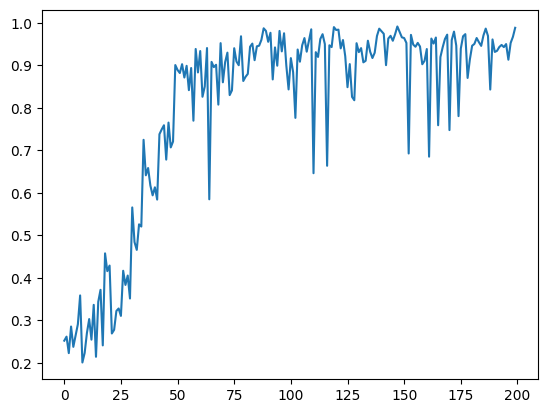

In [10]:
plt.plot(training_results['avg_reward'])